In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from eeg_lib.commons.constant import DATASETS_FOLDER
from eeg_lib.data.data_loader.EEGDataExtractor import EEGDataExtractor
from eeg_lib.commons.constant import NUM_OF_ELECTRODES
from eeg_lib.models.similarity.eegnet import EEGNetEmbeddingModel
from eeg_lib.utils.engine import train_eegnet
from eeg_lib.utils.helpers import train_test_split_eeg, EEGTripletDataset, set_seeds
from eeg_lib.utils.visualisations import plot_loss
import torch
import numpy as np
from torch.utils.data import DataLoader

# Loading data


In [3]:
# Load data
DATA_DIR = f"{DATASETS_FOLDER}/Kolory/"

extractor = EEGDataExtractor(data_dir=DATA_DIR)
eeg_df, participants_info = extractor.extract_dataframe()

Opening raw data file /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/46607ce4@1717.fif...
    Range : 0 ... 194099 =      0.000 ...   776.396 secs
Ready.


/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/46607ce4@1717.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)


Reading 0 ... 194099  =      0.000 ...   776.396 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopb

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/bf2d2193@1638.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/9e8bae0e@1828.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

    Range : 0 ... 253624 =      0.000 ...  1014.496 secs
Ready.
Reading 0 ... 253624  =      0.000 ...  1014.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/51ec2c20@0923.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/90441f44@1643.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

    Range : 0 ... 216624 =      0.000 ...   866.496 secs
Ready.
Reading 0 ... 216624  =      0.000 ...   866.496 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/f82b5699@1757.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/39285860@1825.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/54e60118@1339.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/022e8467@1910.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/ffae50df@1712.fif...
    Range : 0 ... 197

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/ffae50df@1712.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/3033b74a@1626.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Used Annotations descriptions: ['blue', 'break', 'gray', 'green', 'red', 'yellow']
Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 751 original time points ...
0 bad epochs dropped
Opening raw data file /Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/e283301e@1606.fif...
    Range : 0 ... 219

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/e283301e@1606.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/6e542bc2@0845.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

    Range : 0 ... 198649 =      0.000 ...   794.596 secs
Ready.
Reading 0 ... 198649  =      0.000 ...   794.596 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) met

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/06f240e9@1215.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/8bd3032e@1746.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/548fd734@1628.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/6d9a8b86@1613.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/fd8a3308@1135.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/011595b1@1651.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower tran

/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/d87e1bd3@1806.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(file_path, preload=True)
/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/data_loader/EEGDataExtractor.py:53: RuntimeWarning: This filename (/Users/gsk/documents/projects/artificial-intelligence/eeg_lib/data/datasets/Kolory/e08138e2@1731.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_r

# Preparing data


In [4]:
set_seeds()
train_df, test_df, train_participants, test_participants = train_test_split_eeg(
    eeg_df, test_size=0.2
)

train_dataset = EEGTripletDataset(train_df)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)


In [5]:
test_dataset = EEGTripletDataset(test_df)
test_loader = DataLoader(test_dataset)

# Loading model


In [6]:
# Check the size of the train_dataset
print(f"Number of samples in train_dataset: {len(train_dataset)}")

# Check the shape of a single sample (anchor, positive, negative)
sample_anchor, sample_positive, sample_negative = train_dataset[0]
print(f"Shape of anchor: {sample_anchor.shape}")
print(f"Shape of positive: {sample_positive.shape}")
print(f"Shape of negative: {sample_negative.shape}")

Number of samples in train_dataset: 5568
Shape of anchor: torch.Size([1, 4, 751])
Shape of positive: torch.Size([1, 4, 751])
Shape of negative: torch.Size([1, 4, 751])


In [7]:
eegnet_model = EEGNetEmbeddingModel(
    num_channels=4, num_time_points=751, num_classes=0, embedding_dimension=32
)

triplet_loss = torch.nn.TripletMarginLoss(margin=0.05)
eegnet_optimizer = torch.optim.Adam(eegnet_model.parameters(), lr=1e-3)

num_epochs = 40

/Users/gsk/documents/projects/artificial-intelligence/venv/lib/python3.12/site-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [8]:
# Get the shape of items in the dataloader
for anchor, positive, negative in train_loader:
    print(f"Anchor shape: {anchor.shape}")
    print(f"Positive shape: {positive.shape}")
    print(f"Negative shape: {negative.shape}")
    break  # Print shapes for the first batch only

Anchor shape: torch.Size([8, 1, 4, 751])
Positive shape: torch.Size([8, 1, 4, 751])
Negative shape: torch.Size([8, 1, 4, 751])


In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
eegnet_model = eegnet_model.to(device)

In [12]:
train_history = train_eegnet(
    eegnet_model, train_loader, eegnet_optimizer, device, triplet_loss, num_epochs
)

Epoch 1/40 | Train Loss: 0.0871
Epoch 2/40 | Train Loss: 0.0685
Epoch 3/40 | Train Loss: 0.0621
Epoch 4/40 | Train Loss: 0.0585
Epoch 5/40 | Train Loss: 0.0575
Epoch 6/40 | Train Loss: 0.0561
Epoch 7/40 | Train Loss: 0.0546
Epoch 8/40 | Train Loss: 0.0535
Epoch 9/40 | Train Loss: 0.0521
Epoch 10/40 | Train Loss: 0.0528
Epoch 11/40 | Train Loss: 0.0504
Epoch 12/40 | Train Loss: 0.0503
Epoch 13/40 | Train Loss: 0.0505
Epoch 14/40 | Train Loss: 0.0486
Epoch 15/40 | Train Loss: 0.0427
Epoch 16/40 | Train Loss: 0.0329
Epoch 17/40 | Train Loss: 0.0322
Epoch 18/40 | Train Loss: 0.0307
Epoch 19/40 | Train Loss: 0.0313
Epoch 20/40 | Train Loss: 0.0306
Epoch 21/40 | Train Loss: 0.0293
Epoch 22/40 | Train Loss: 0.0303
Epoch 23/40 | Train Loss: 0.0269
Epoch 24/40 | Train Loss: 0.0259
Epoch 25/40 | Train Loss: 0.0252
Epoch 26/40 | Train Loss: 0.0243
Epoch 27/40 | Train Loss: 0.0236
Epoch 28/40 | Train Loss: 0.0239
Epoch 29/40 | Train Loss: 0.0233
Epoch 30/40 | Train Loss: 0.0227
Epoch 31/40 | Train

In [13]:
model_save_path = f"./eegnet_model.pth"
torch.save(eegnet_model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to ./eegnet_model.pth


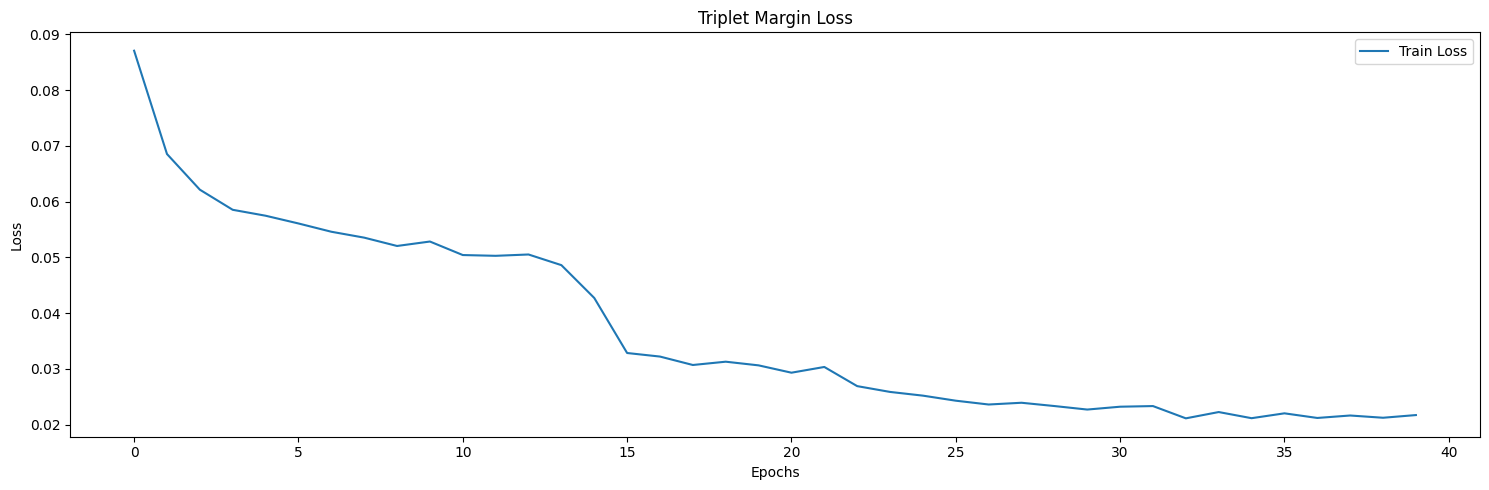

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(train_history["train_loss"], label="Train Loss")
plt.title("Triplet Margin Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

<Figure size 1000x1000 with 0 Axes>

In [17]:
# Generate test embeddings
eegnet_model.eval()  # Set the model to evaluation mode
test_embeddings = []

with torch.no_grad():  # Disable gradient computation
    for anchor, positive, negative in test_loader:
        anchor = anchor.to(device)
        embeddings = eegnet_model(anchor)
        test_embeddings.append(embeddings.cpu().numpy())

# Concatenate all embeddings into a single array
test_embeddings = np.concatenate(test_embeddings, axis=0)
print(f"Generated test embeddings with shape: {test_embeddings.shape}")

Generated test embeddings with shape: (1392, 32)


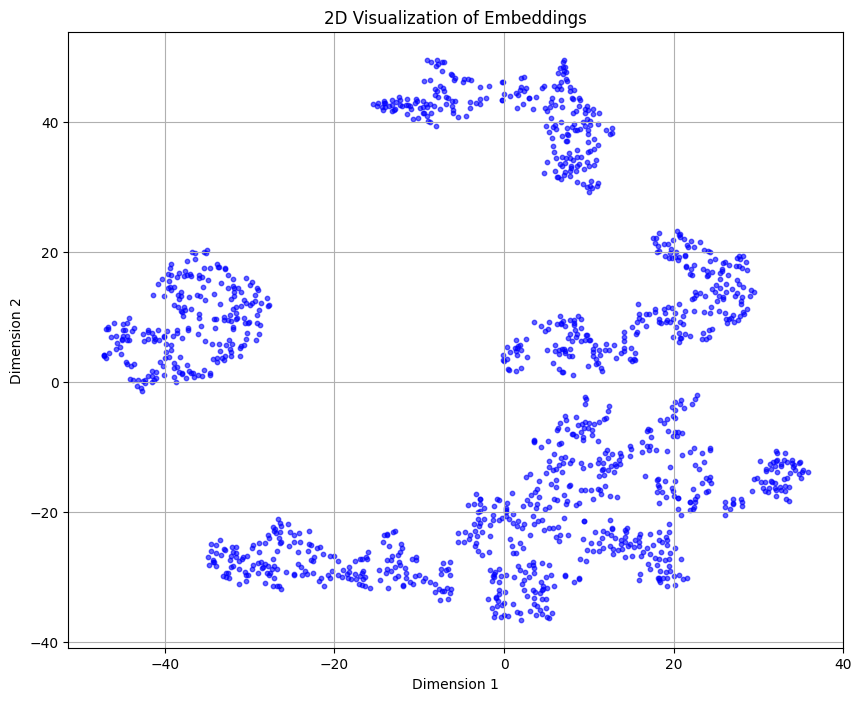

In [19]:
import matplotlib.pyplot as plt

# Plot the 2D embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.6, s=10, c='blue')
plt.title("2D Visualization of Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

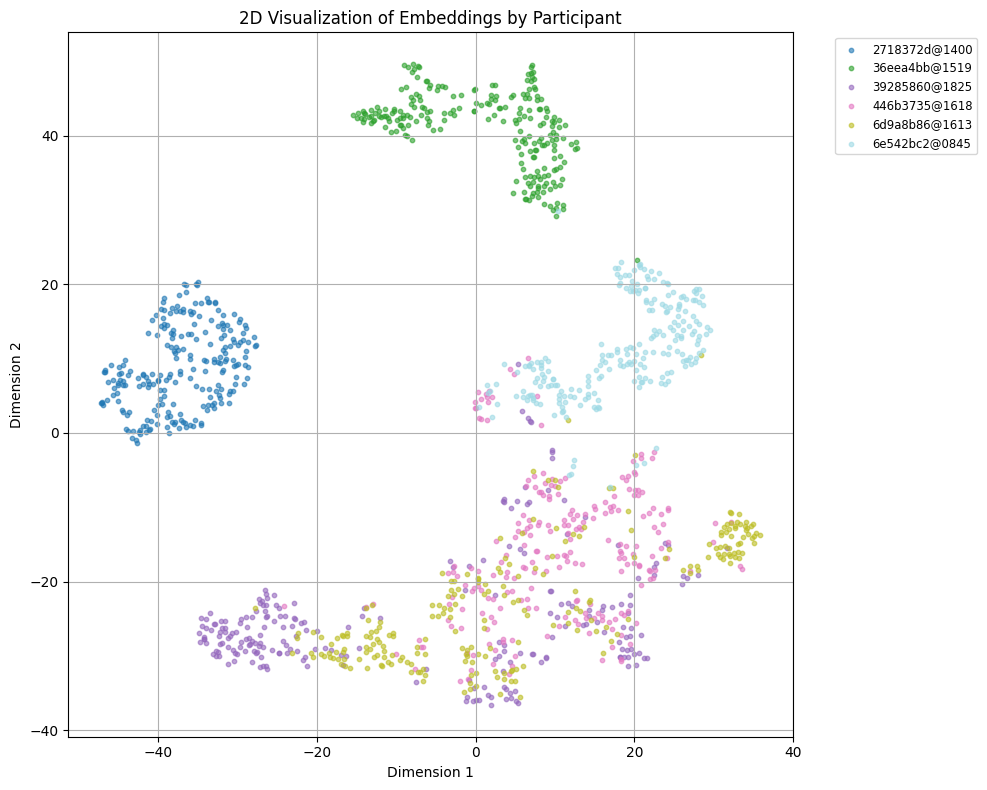

In [23]:
import matplotlib.pyplot as plt

# Assuming `participant_ids` corresponds to the embeddings
unique_participants = np.unique(participant_ids)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_participants)))

plt.figure(figsize=(10, 8))

for i, participant in enumerate(unique_participants):
    mask = participant_ids == participant
    plt.scatter(
        embeddings_2d[mask, 0],
        embeddings_2d[mask, 1],
        label=participant,
        color=colors[i],
        alpha=0.6,
        s=10
    )

plt.title("2D Visualization of Embeddings by Participant")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/gsk/documents/projects/artificial-intelligence/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/gsk/documents/projects/artificial-intelligence/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gsk/documents/projects/artificial-intelligence/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


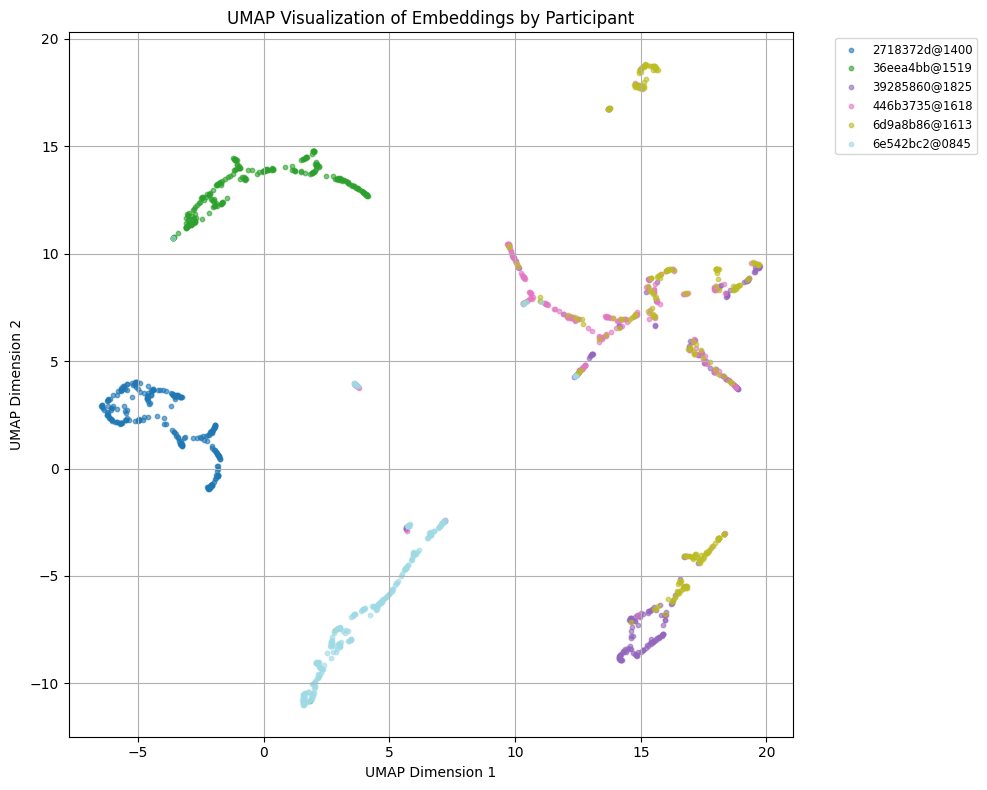

In [26]:
import umap.umap_ as umap

# Generate UMAP embeddings
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings_2d)

# Plot the UMAP embeddings
plt.figure(figsize=(10, 8))
for i, participant in enumerate(unique_participants):
    mask = participant_ids == participant
    plt.scatter(
        umap_embeddings[mask, 0],
        umap_embeddings[mask, 1],
        label=participant,
        color=colors[i],
        alpha=0.6,
        s=10
    )

plt.title("UMAP Visualization of Embeddings by Participant")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


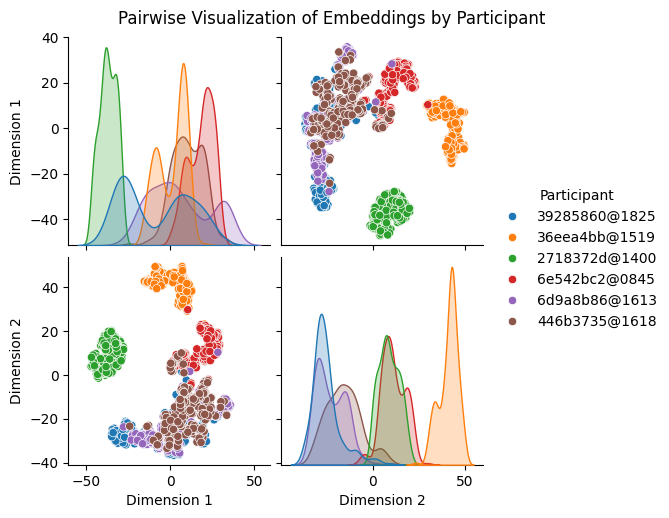

In [27]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for embeddings and participant IDs
embedding_df = pd.DataFrame(embeddings_2d, columns=["Dimension 1", "Dimension 2"])
embedding_df["Participant"] = participant_ids

# Plot pairwise relationships
sns.pairplot(embedding_df, hue="Participant", diag_kind="kde", palette="tab10", height=2.5)
plt.suptitle("Pairwise Visualization of Embeddings by Participant", y=1.02)
plt.show()

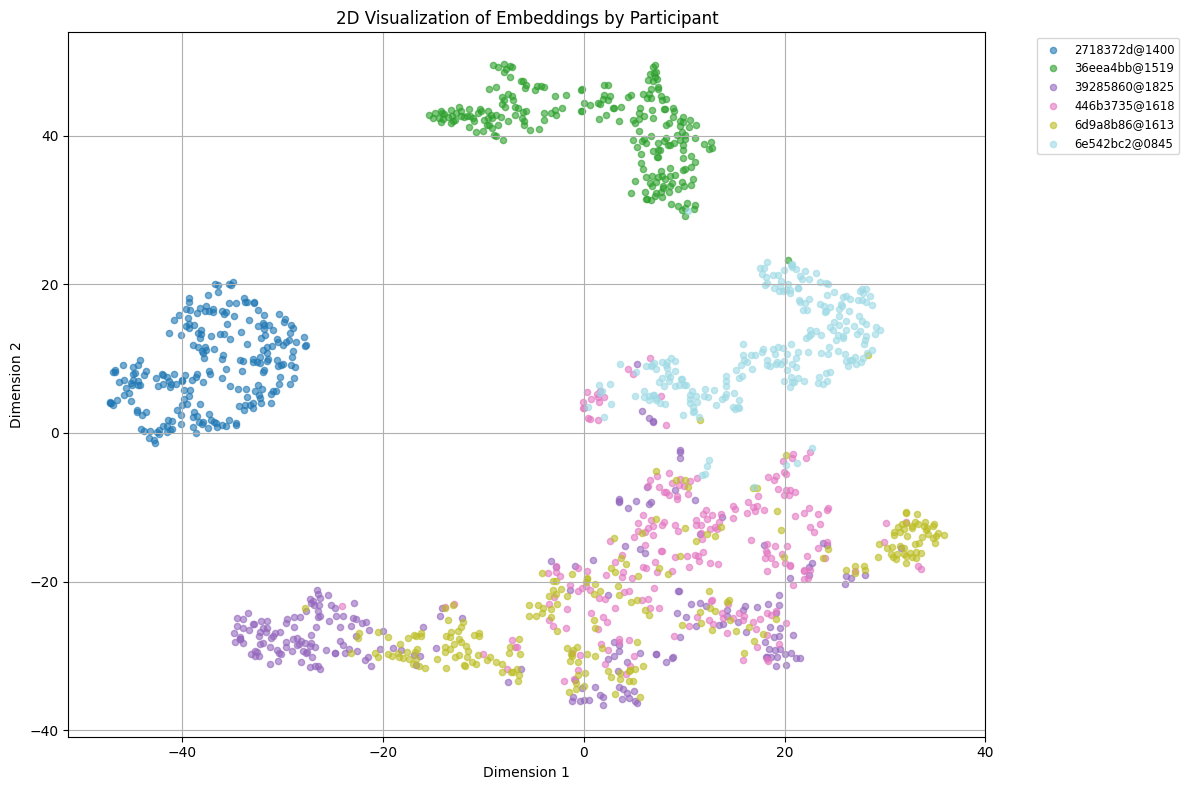

In [28]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a scatter plot of the 2D embeddings
plt.figure(figsize=(12, 8))

# Plot each participant's embeddings with a unique color
for participant, color in zip(unique_participants, colors):
    mask = participant_ids == participant
    plt.scatter(
        embeddings_2d[mask, 0],
        embeddings_2d[mask, 1],
        label=participant,
        color=color,
        alpha=0.6,
        s=20
    )

plt.title("2D Visualization of Embeddings by Participant")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

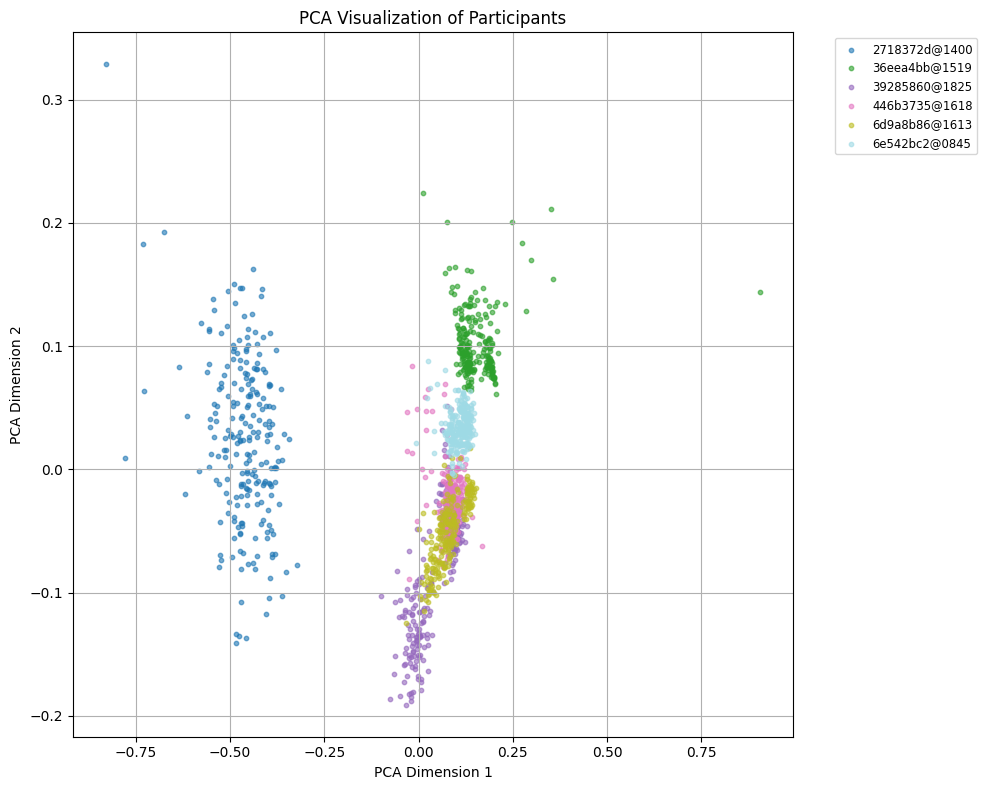

In [32]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=5)
pca_embeddings = pca.fit_transform(all_embeddings)

# Plot the PCA embeddings
plt.figure(figsize=(10, 8))
for i, participant in enumerate(unique_participants):
    mask = participant_ids == participant
    plt.scatter(
        pca_embeddings[mask, 0],
        pca_embeddings[mask, 1],
        label=participant,
        color=colors[i],
        alpha=0.6,
        s=10
    )

plt.title("PCA Visualization of Participants")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Apply PCA to reduce dimensions to 2 for test embeddings
pca_test = PCA(n_components=2)
pca_test_embeddings = pca_test.fit_transform(test_embeddings)

# Plot the PCA embeddings for test data
plt.figure(figsize=(10, 8))
for i, participant in enumerate(unique_participants):
    mask = participant_ids == participant
    plt.scatter(
        pca_test_embeddings[mask, 0],
        pca_test_embeddings[mask, 1],
        label=participant,
        color=colors[i],
        alpha=0.6,
        s=10
    )

plt.title("PCA Visualization of Test Participants")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()